# All the data paths

In [2]:
from pathlib import Path
semantic_data = Path('dataset/semantic-segmentation-asol')
trimmed_dataset = Path('dataset/trimmed-data/images')

## Extract classnames

In [2]:
import csv

classes_file = semantic_data / 'train' / '_classes.csv'
# Dict of class names and their corresponding pixel value
classes_dict = {}

with open(classes_file, mode='r') as file:
    reader = csv.reader(file)
    reader.__next__()
    for row in reader:
        classes_dict[row[1]] = int(row[0])


In [3]:
classes_dict

{' background': 0, ' Pole': 1}

## Open masks, iterate over contours and get moments

In [3]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

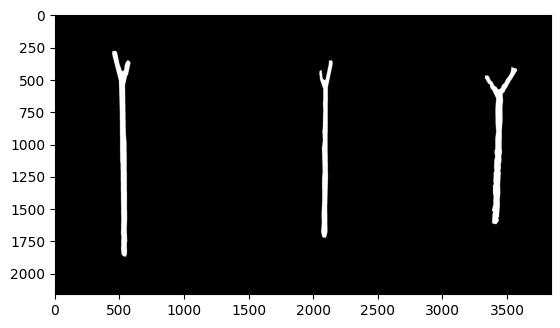

In [6]:
for file in (semantic_data / 'train').iterdir():
    if file.is_file() and file.suffix == '.png' and '_mask' in file.name:
        img = cv.imread(str(file), cv.IMREAD_GRAYSCALE)
        plt.subplots(1, 1)[1].imshow(img, cmap='gray')
        break



In [65]:
Path(semantic_data / 'train' / file.name.replace('_mask', '')).exists()

False

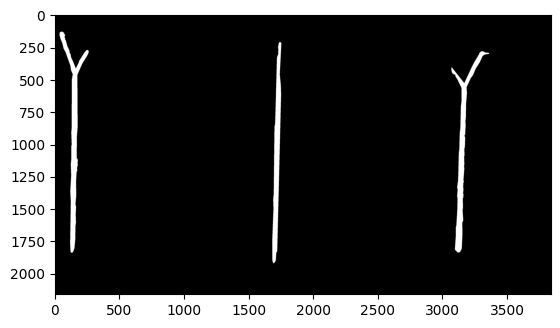

In [72]:
img =cv.imread(str(file), cv.IMREAD_GRAYSCALE)
plt.subplots(1, 1)[1].imshow(img, cmap='gray')

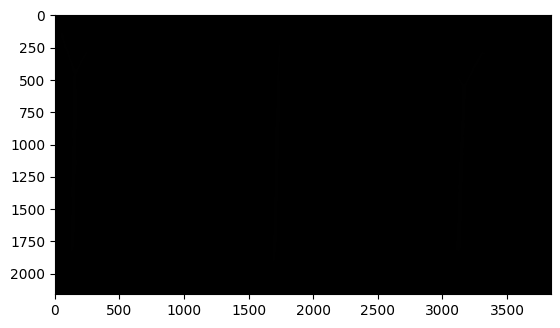

In [68]:
plt.subplots(1, 1)[1].imshow(cv.imread(str(file)), cmap='gray')

[array([[[ 48, 136]],
 
        [[ 47, 137]],
 
        [[ 45, 137]],
 
        ...,
 
        [[ 59, 137]],
 
        [[ 53, 137]],
 
        [[ 52, 136]]], dtype=int32),
 array([[[1736,  217]],
 
        [[1735,  218]],
 
        [[1733,  218]],
 
        [[1732,  219]],
 
        [[1731,  219]],
 
        [[1731,  220]],
 
        [[1730,  221]],
 
        [[1730,  225]],
 
        [[1729,  226]],
 
        [[1729,  229]],
 
        [[1728,  230]],
 
        [[1728,  233]],
 
        [[1727,  234]],
 
        [[1727,  238]],
 
        [[1726,  239]],
 
        [[1726,  242]],
 
        [[1725,  243]],
 
        [[1725,  246]],
 
        [[1724,  247]],
 
        [[1724,  251]],
 
        [[1723,  252]],
 
        [[1723,  256]],
 
        [[1724,  257]],
 
        [[1724,  262]],
 
        [[1725,  263]],
 
        [[1725,  268]],
 
        [[1726,  269]],
 
        [[1726,  281]],
 
        [[1725,  282]],
 
        [[1725,  301]],
 
        [[1724,  302]],
 
        [[1724,  312]]

In [78]:
for file in (semantic_data / 'train').iterdir():
    if file.is_file() and file.suffix == '.png' and '_mask' in file.name:
        img = cv.imread(str(file), cv.IMREAD_GRAYSCALE)
        contours, hier = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
        contours = [c for c in contours if cv.contourArea(c) > 1000]
        contours.sort(key=lambda x: cv.boundingRect(x)[0])
        print()
        print(file.name)
        print(len(contours))
        h_max, w_max = img.shape
        if len(contours) > 1:
            for idx, (c1, c2) in enumerate(zip(contours[:-1], contours[1:])):
                c1_moment = cv.moments(c1)
                c2_moment = cv.moments(c2)
                c1_centroid_x = max(int(c1_moment['m10']/c1_moment['m00']) - 40, 0)
                c2_centroid_x = min(int(c2_moment['m10']/c2_moment['m00']) + 40, w_max)
                combined_contour = np.concatenate((c1, c2))
                x, y, w, h = cv.boundingRect(combined_contour)
                # plt.subplots(1, 1)[1].imshow(img[max(y-250, 0):min(y+h+50, h_max), c1_centroid_x:c2_centroid_x], cmap='gray')

                # Save images to trimmed dataset
                color_img = cv.imread(str(semantic_data / 'train' / file.with_suffix('.jpg').name.replace('_mask', '')))
                save_img_name = file.name.replace('_mask', f'_{idx}')
                cv.imwrite(str(trimmed_dataset / save_img_name), color_img[max(y-250, 0):min(y+h+50, h_max), c1_centroid_x:c2_centroid_x])



20241025_102238-mp4_frame_4_jpg.rf.61a1c1b27f40efc1785865f3f19ccff6_mask.png
3

20241025_102238-mp4_frame_5_jpg.rf.b9a60617759456bdbb35a0710c59f071_mask.png
2

20241025_103255-mp4_frame_25_jpg.rf.cb9395646ce3f5f983d89d5df9d3ebf1_mask.png
3

20241025_104213-mp4_frame_10_jpg.rf.e860917726d4f5b0630a24400b47d7fc_mask.png
3

20241025_104213-mp4_frame_13_jpg.rf.9f3395f8293a21182fbf065951979d06_mask.png
2

20241025_104213-mp4_frame_23_jpg.rf.0c5d0ce3574ef33689800d2fcf86ea85_mask.png
2

20241025_104213-mp4_frame_7_jpg.rf.cfe3faab3ea724fbd76bbe3f930a247a_mask.png
2

20241025_105536-mp4_frame_12_jpg.rf.0dd4309c8f394caf54f5d78d825182d0_mask.png
3

20241025_105536-mp4_frame_16_jpg.rf.95c48e2beba12af6c6bfe009dc61328b_mask.png
3

20241025_110802-mp4_frame_102_jpg.rf.402a1cd419de69a0348114cdf4bf858d_mask.png
1

20241025_111643-mp4_frame_0_jpg.rf.f6b532ce1564f4b33b8df125e9c4faa0_mask.png
3

20241025_111643-mp4_frame_100_jpg.rf.64c3f05819acca941f92850097e26e5f_mask.png
4

20241025_111643-mp4_frame_138

# Extracting info from annotations.coco.json file

In [11]:
import json

In [13]:
roboflow_path = Path('asol-keypoint.v2i.coco-segmentation')
images_path = roboflow_path / 'train'
anno_path = roboflow_path / 'train' / '_annotations.coco.json'

In [6]:
with open(anno_path, mode='r') as file:
    json_file = json.load(file)

# image id -> (file_name, height, width)
image_dict: dict[int, (str, int, int)] = {}

for image in json_file['images']:
    image_dict[image['id']] = (image['file_name'], image['height'], image['width'])


In [8]:
# image id -> list of annotations
img_annotations: dict[int, list[dict]] = {}
for anno in json_file["annotations"]:
    if anno['image_id'] not in img_annotations:
        img_annotations[anno['image_id']] = []
    img_annotations[anno['image_id']].append(anno)
    

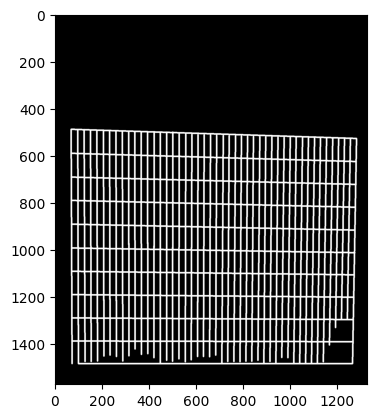

In [30]:
for img_id, (file_name, height, width) in image_dict.items():
    if img_id in img_annotations:
        img = cv.imread(str(images_path / file_name))
        mask = np.zeros((height, width, 1), dtype=np.uint8)
        anno_vertical = []
        anno_horizontal = []

        for anno in img_annotations[img_id]:
            keypoints_flat = anno['segmentation'][0]
            keypoints = [(int(keypoints_flat[i]), int(keypoints_flat[i+1])) for i in range(0, len(keypoints_flat), 2)]
            if anno['category_id'] == 1:
                anno_vertical.append(keypoints)
            elif anno['category_id'] == 2:
                anno_horizontal.append(keypoints)
            else:
                raise ValueError(f'Unknown category_id: {anno["category_id"]}')

        assert len(anno_vertical) == 2
        assert len(anno_vertical) == len(anno_horizontal)
        # connect the points with the same category_id

        for p1, p2 in zip(*anno_vertical):
            cv.line(mask, p1, p2, 255, 5)

        for p1, p2 in zip(*anno_horizontal):
            cv.line(mask, p1, p2, 255, 5)

        plt.subplots(1, 1)[1].imshow(mask, cmap='gray')
        break
            

# Creating hole dataset

C:\Users\jkoro\AppData\Local\Temp\ipykernel_9276\3288647350.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 2)


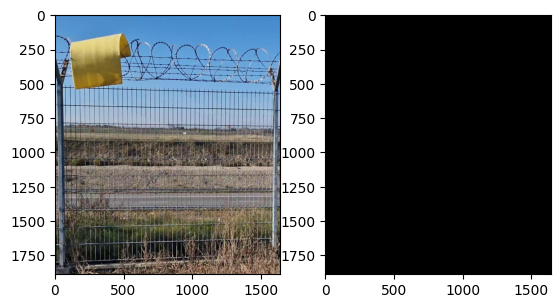

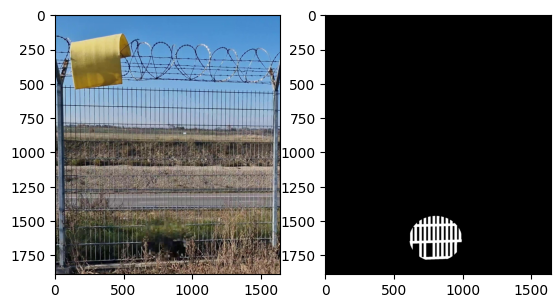

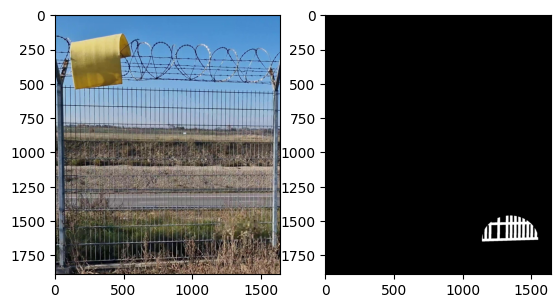

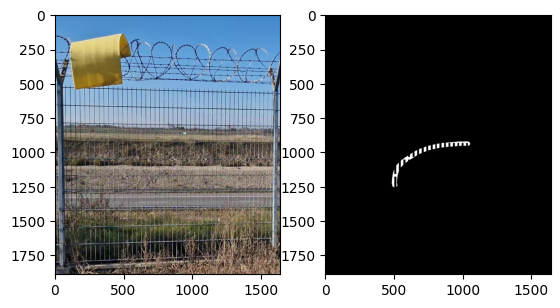

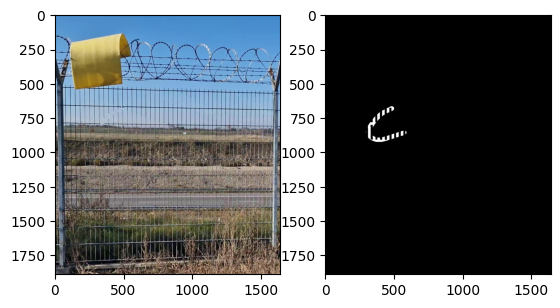

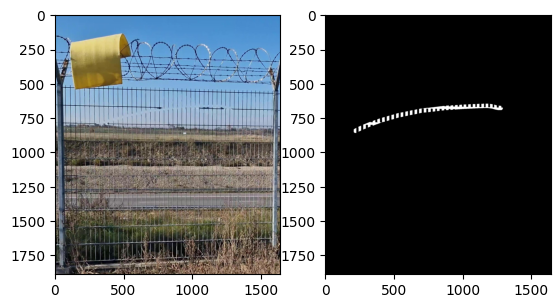

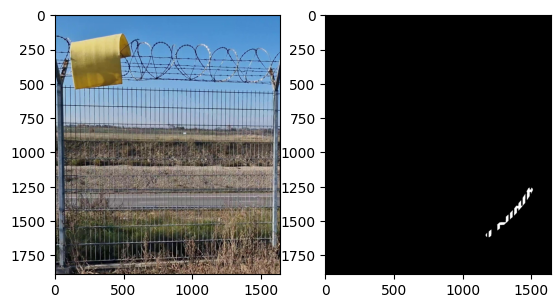

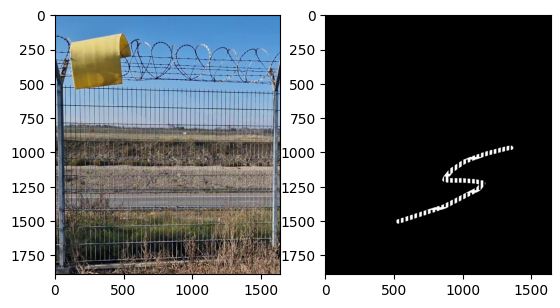

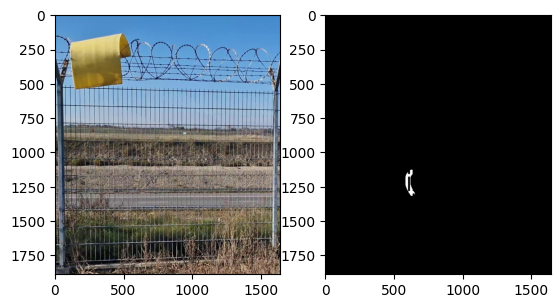

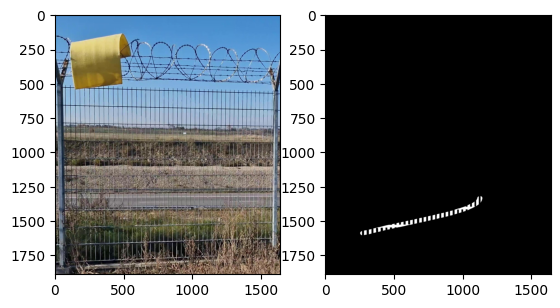

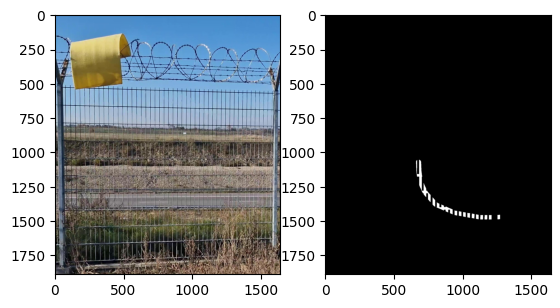

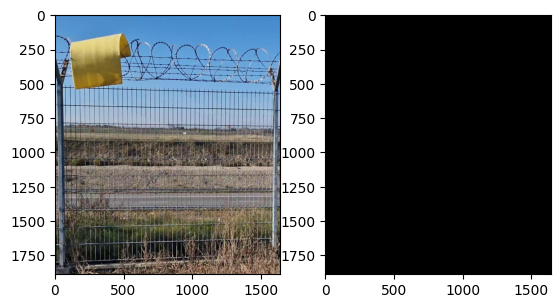

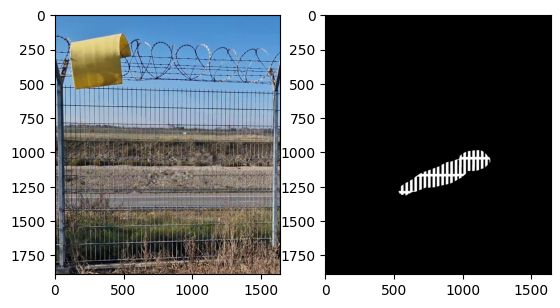

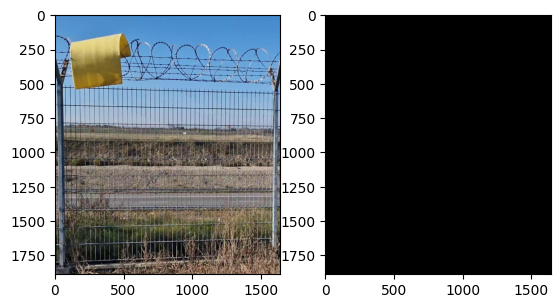

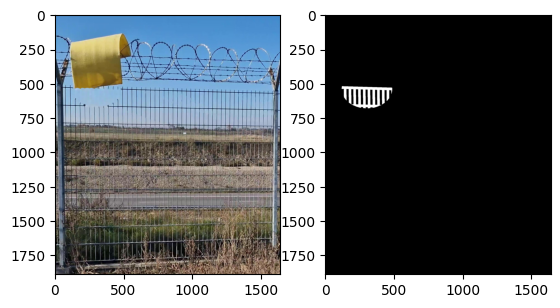

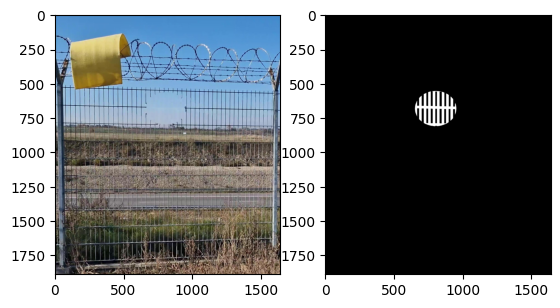

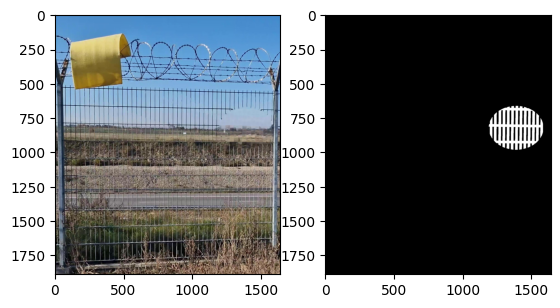

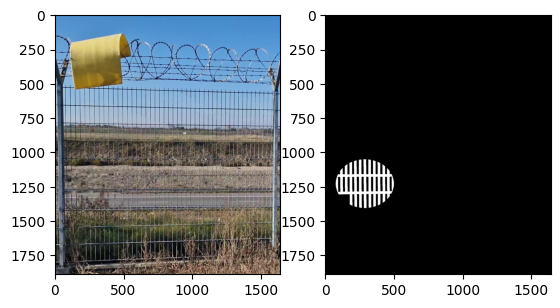

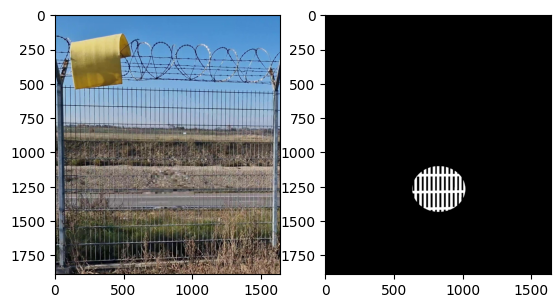

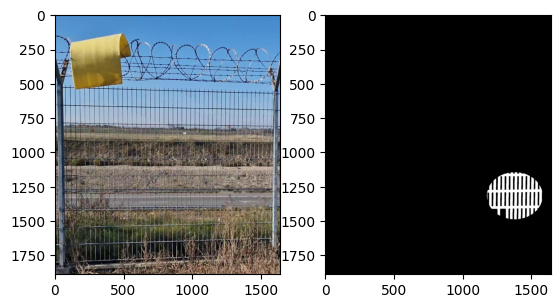

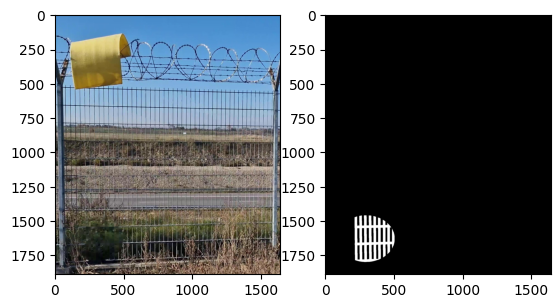

In [61]:
mask_dataset = Path("shape_masks")
fence_structure = roboflow_path / 'masks'
for img_file in images_path.iterdir():
    if img_file.suffix in ['.jpg', '.jpeg', '.png']:
        for mask_file in mask_dataset.iterdir():
            if mask_file.suffix in ['.jpg', '.jpeg', '.png']:
                img = cv.imread(str(img_file))
                fence_mask = cv.imread(str(fence_structure / img_file.name), cv.IMREAD_GRAYSCALE)
                assert img.shape[0] == fence_mask.shape[0] and img.shape[1] == fence_mask.shape[1]
                mask_img = cv.imread(str(mask_file), cv.IMREAD_GRAYSCALE)
                # plt.subplots(1, 1)[1].imshow(mask_img, cmap='gray')
                mask_img = cv.resize(mask_img, (img.shape[1], img.shape[0]), interpolation=cv.INTER_NEAREST)
                # plt.subplots(1, 1)[1].imshow(mask_img, cmap='gray')

                kernel = np.ones((5, 5), np.uint8)
                mask = cv.dilate(fence_mask, kernel, iterations=3)

                combined_mask = cv.bitwise_and(mask, mask_img)
                # plt.subplots(1, 1)[1].imshow(mask, cmap='gray')
                # plt.subplots(1, 1)[1].imshow(combined_mask, cmap='gray')

                inpaint = cv.inpaint(img, combined_mask, inpaintRadius=3, flags=cv.INPAINT_TELEA)
                fig, ax = plt.subplots(1, 2)
                ax[0].imshow(inpaint[..., ::-1])
                ax[1].imshow(combined_mask, cmap='gray')
                
            # break
    break


In [ ]:
img = cv.imread('../real/real.jpg')
mask = cv.imread('../real/real_mask.png', cv.IMREAD_GRAYSCALE)
